In [11]:
!pip install pennylane
!pip install pennylane-qiskit
!pip install numpy


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import pennylane as qml
import numpy as np
from pennylane import numpy as pnp
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [13]:
iris = load_iris()
X = iris.data[:100]
y = iris.target[:100]

In [14]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
dev = qml.device("default.qubit", wires=2)

In [16]:
@qml.qnode(dev)
def quantum_circuit(weights, x=None):
    # Feature encoding (rotation gates based on the input features)
    qml.Rot(x[0], x[1], x[0], wires=0)
    qml.Rot(x[1], x[0], x[1], wires=1)

    # Apply variational circuit (a simple Ansatz)
    qml.CNOT(wires=[0, 1])  # CNOT gate
    qml.Rot(weights[0], weights[1], weights[2], wires=0)
    qml.Rot(weights[3], weights[4], weights[5], wires=1)

    # Measurement
    return qml.expval(qml.PauliZ(0))

(<Figure size 600x300 with 1 Axes>, <Axes: >)


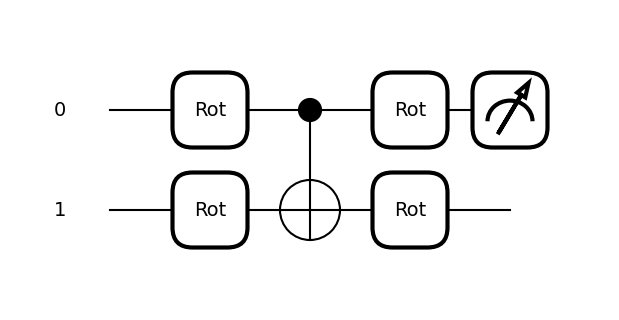

In [17]:
cd5=qml.draw_mpl(quantum_circuit)(np.random.randn(6), x=X[0])
print(cd5)

In [20]:
from scipy.optimize import minimize

def cost_function(weights, X_train, y_train):
    predictions = []
    for x in X_train:
        pred = quantum_circuit(weights, x=x)
        predictions.append(pred)

    predictions = np.array(predictions)
    # Convert predictions to binary (threshold at 0)
    predictions = np.where(predictions > 0, 1, 0)
    return np.mean((predictions - y_train) ** 2)  # Mean squared error

# 5. Initialize weights randomly and train the model
init_weights = np.random.randn(6)  # 6 weights for 2 qubits
optimizer = minimize(cost_function, init_weights, args=(X_train, y_train), method="COBYLA")

# 6. Make predictions on the test set
test_predictions = []
for x in X_test:
    pred = quantum_circuit(optimizer.x, x=x)
    test_predictions.append(pred)


In [21]:
test_predictions = np.array(test_predictions)
test_predictions = np.where(test_predictions > 0, 1, 0)

# 7. Evaluate accuracy
accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.7500
